In [55]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [56]:
#carregando o arquivo
df = pd.read_csv('tabelaOscar.csv')

#exibindo os 5 primeiros dados
df.head()

,Unnamed: 0,birth_year,birth_date,birthplace,race_ethnicity,religion,sexual_orientation,year_edition,category,movie
0,Marie Dressler,1868,1868-11-02,"Cobourg, Ontario, Canada",White,NaN,Straight,1931,Best Actress,Min and Bill
1,George Arliss,1868,1868-04-10,"London, England",White,NaN,Straight,1930,Best Actor,Desraeli
2,Edmund Gwenn,1875,1875-09-26,"Vale of Glamorgan, Wales",White,NaN,Na,1948,Best Supporting Actor,Miracle on 34th Street
3,Charles Coburn,1877,1877-06-17,"Savannah, Ga",White,NaN,Straight,1944,Best Supporting Actor,The More the Merrier
4,Lionel Barrymore,1878,1878-04-28,"Philadelphia, Pa",White,Roman Catholic,Straight,1931,Best Actor,A Free Soul


In [57]:
#renomeando as colunas
df.rename(columns={'Unnamed: 0': 'nome', 'birth_year': 'ano_nascimento', 'birth_date': 'data_nascimento',
'birthplace': 'local_nascimento','race_ethnicity': 'etnia','religion': 'religiao','sexual_orientation': 'orientacao_sexual','year_edition': 'ano_edicao','category': 'categoria','movie': 'filme',}, inplace=True)

In [58]:
# Preenchendo os dados faltantes na coluna 'data_nascimento' com um valor padrão
df['data_nascimento'] = df['data_nascimento'].fillna('Data desconhecida')

In [59]:
# Descrição dos dados 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nome               415 non-null    object
 1   ano_nascimento     415 non-null    int64 
 2   data_nascimento    415 non-null    object
 3   local_nascimento   415 non-null    object
 4   etnia              415 non-null    object
 5   religiao           159 non-null    object
 6   orientacao_sexual  415 non-null    object
 7   ano_edicao         415 non-null    int64 
 8   categoria          415 non-null    object
 9   filme              415 non-null    object
dtypes: int64(2), object(8)
memory usage: 32.5+ KB


In [60]:
#Verificação de valores ausentes
df.isnull().sum()

nome                   0
ano_nascimento         0
data_nascimento        0
local_nascimento       0
etnia                  0
religiao             256
orientacao_sexual      0
ano_edicao             0
categoria              0
filme                  0
dtype: int64

In [61]:
# Quais são as religiões presentes no DataFrame?
df['religiao'].value_counts()

religiao
Roman Catholic           57
Jewish                   45
Atheist                  15
Baptist                   5
Protestant                5
Born-Again Christian      4
Buddhist                  4
Lutheran                  3
Christian Science         3
Deist                     3
Anglican/episcopalian     2
Christian                 2
Presbyterian              2
Quaker                    2
See Note                  1
Agnostic                  1
Sufism                    1
Methodist                 1
Congregationalist         1
Disciples of Christ       1
Hindu                     1
Name: count, dtype: int64

In [62]:
#Tratamento de dados faltantes: Criação de uma nova categoria de religião "Desconhecida"
df['religiao'] = df['religiao'].fillna('Desconhecida')
df.isnull().sum()

nome                 0
ano_nascimento       0
data_nascimento      0
local_nascimento     0
etnia                0
religiao             0
orientacao_sexual    0
ano_edicao           0
categoria            0
filme                0
dtype: int64

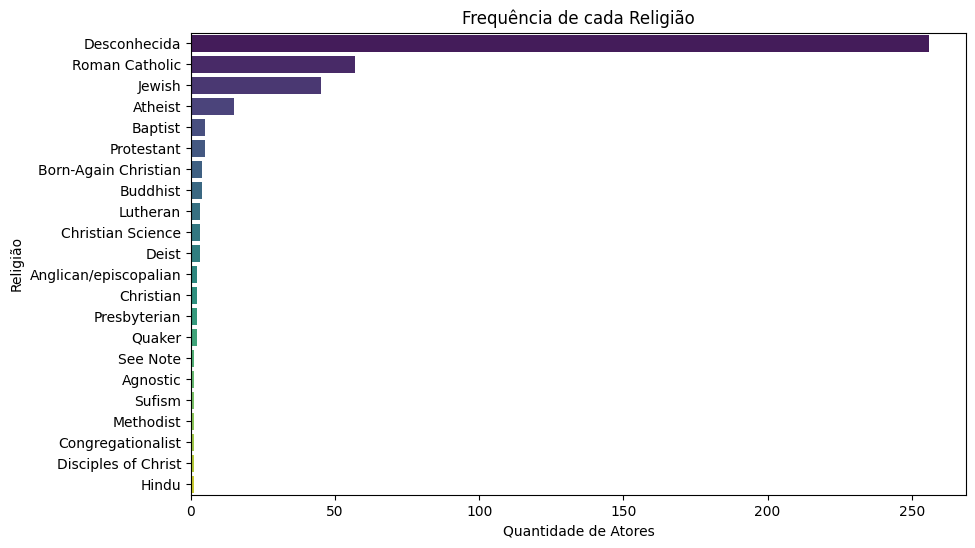

                 religiao  count
0            Desconhecida    256
1          Roman Catholic     57
2                  Jewish     45
3                 Atheist     15
4                 Baptist      5
5              Protestant      5
6    Born-Again Christian      4
7                Buddhist      4
8                Lutheran      3
9       Christian Science      3
10                  Deist      3
11  Anglican/episcopalian      2
12              Christian      2
13           Presbyterian      2
14                 Quaker      2
15               See Note      1
16               Agnostic      1
17                 Sufism      1
18              Methodist      1
19      Congregationalist      1
20    Disciples of Christ      1
21                  Hindu      1


In [63]:
# Contar a frequência de cada religião
religion_counts = df['religiao'].value_counts().reset_index()
religion_counts.columns = ['religiao', 'count']

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='religiao', data=religion_counts, hue='religiao', palette='viridis', legend=False)
plt.title('Frequência de cada Religião')
plt.xlabel('Quantidade de Atores')
plt.ylabel('Religião')
plt.show()
print(religion_counts)

In [64]:
#exibindo os 5 últimos dados
df.tail()

,nome,ano_nascimento,data_nascimento,local_nascimento,etnia,religiao,orientacao_sexual,ano_edicao,categoria,filme
410,Natalie Portman,1981,1981-06-09,"Jerusalem, Israel",White,Jewish,Straight,2011,Best Actress,Black Swan
411,Anne Hathaway,1982,1982-11-12,"Brooklyn, Ny",White,Christian,Straight,2013,Best Supporting Actress,Les MisÌ©rables
412,Anna Paquin,1982,1982-07-24,"Winnipeg, Manitoba, Canada",White,Desconhecida,Bisexual,1994,Best Supporting Actress,The Piano
413,Lupita Nyong'o,1983,1983-03-01,"Mexico City, Mexico",Black,Desconhecida,Na,2014,Best Supporting Actress,12 Years a Slave
414,Jennifer Lawrence,1990,1990-08-15,"Louisville, Ky",White,Desconhecida,Na,2013,Best Actress,Silver Linings Playbook


In [65]:
# Qual o tamanho do Dataframe?
#o primeiro dado é referente a quantidade de linhas. O segundo é a quantidade de colunas
df.shape

(415, 10)

In [66]:
#Analise matemática das colunas numéricas
df.describe()

,ano_nascimento,ano_edicao
count,415.000000,415.000000
mean,1928.848193,1972.867470
std,25.716376,24.057284
min,1868.000000,1927.000000
25%,1908.000000,1952.500000
50%,1928.000000,1973.000000
75%,1949.000000,1994.000000
max,1990.000000,2014.000000


<Axes: xlabel='ano_edicao'>

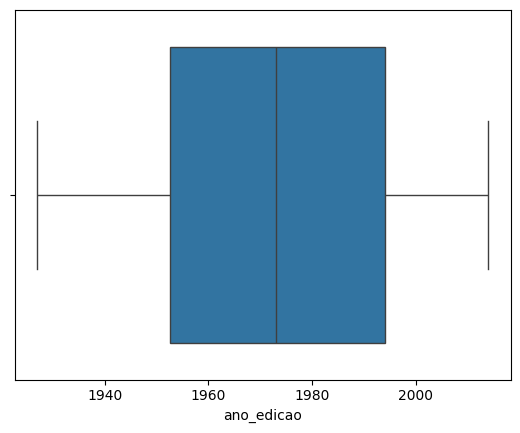

In [67]:
#Verificação da existência de outliers nas variáveis numéricas
# coluna: ano_edicao
sns.boxplot(x=df['ano_edicao'])

<Axes: xlabel='ano_nascimento'>

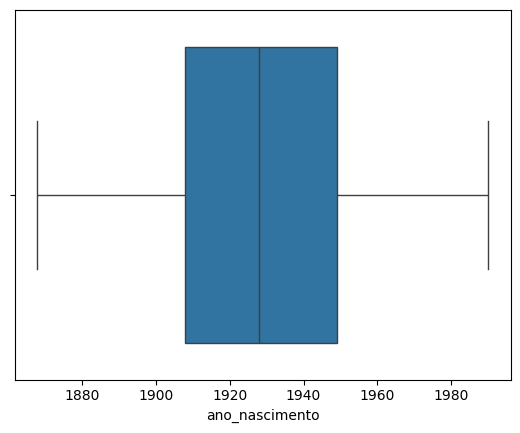

In [68]:
# coluna ano_nascimento
sns.boxplot(x=df['ano_nascimento'])

<Axes: xlabel='idade'>

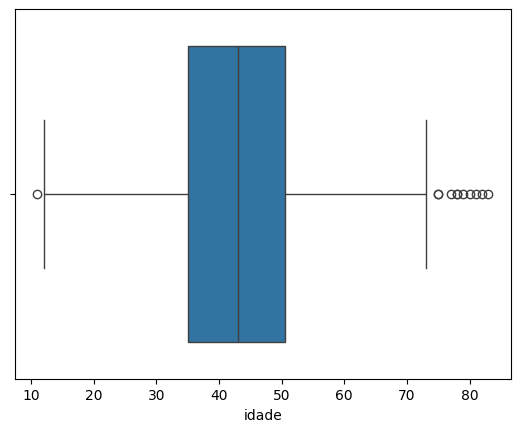

In [69]:
#Verificação da existência de outliers 
# parâmetro: idade

# Calcula a idade dos indicados no ano da edição do Oscar
df['idade'] = df['ano_edicao'] - df['ano_nascimento']

sns.boxplot(x=df['idade'])

In [70]:
# Qual a porcentagem de indicações no quesito categoria?
#Verificação das proporções das indicações (porcentagem)
df['categoria'].value_counts(normalize=True) * 100

categoria
Best Actress               20.963855
Best Actor                 20.722892
Best Director              20.722892
Best Supporting Actor      18.795181
Best Supporting Actress    18.795181
Name: proportion, dtype: float64

In [71]:
# Qual a porcentagem de indicações no quesito etnia?
#Verificação das proporções das etnias (porcentagem)
df['etnia'].value_counts(normalize=True) * 100

etnia
White             93.012048
Black              3.373494
Hispanic           1.927711
Asian              0.963855
Multiracial        0.481928
Middle Eastern     0.240964
Name: proportion, dtype: float64

In [72]:
# Qual a porcentagem de indicações no quesito orientação sexual?
#Verificação das proporções de orientação sexual (porcentagem)
df['orientacao_sexual'].value_counts(normalize=True) * 100

orientacao_sexual
Straight             89.879518
Bisexual              4.819277
Na                    2.409639
Gay                   1.686747
Matter of Dispute     0.722892
Lesbian               0.481928
Name: proportion, dtype: float64

In [73]:
# Qual a porcentagem de indicações no quesito religião?
#Verificação das proporções de religião (porcentagem)
df['religiao'].value_counts(normalize=True) * 100

religiao
Desconhecida             61.686747
Roman Catholic           13.734940
Jewish                   10.843373
Atheist                   3.614458
Baptist                   1.204819
Protestant                1.204819
Born-Again Christian      0.963855
Buddhist                  0.963855
Lutheran                  0.722892
Christian Science         0.722892
Deist                     0.722892
Anglican/episcopalian     0.481928
Christian                 0.481928
Presbyterian              0.481928
Quaker                    0.481928
See Note                  0.240964
Agnostic                  0.240964
Sufism                    0.240964
Methodist                 0.240964
Congregationalist         0.240964
Disciples of Christ       0.240964
Hindu                     0.240964
Name: proportion, dtype: float64

In [74]:
# Qual é o filme mais antigo e mais recente do Dataframe? Qual é o ano da edição deles?
# Ordenando o DataFrame pelo ano de edição
df_sorted = df.sort_values(by='ano_edicao')

# Selecionando os filmes mais antigo e mais recente
filmes_especificos = df_sorted.iloc[[0, -1]]

# Exibindo os dados do filme mais antigo e mais recente do DataFrame
print(filmes_especificos[['filme', 'ano_edicao']])

                   filme  ano_edicao
36   Two Arabian Knights        1927
387   Dallas Buyers Club        2014


In [75]:
# Qual ator/atriz é mais velho(a)? Qual é mais novo(a)? Quais são sua data e local de nascimento?

# Ordenando o DataFrame pela data de nascimento
df_sorted = df.sort_values(by='data_nascimento')

# Selecionando os atores mais velho e mais novo
atores_especificos = df_sorted.iloc[[0, -2]] #-2 pq 0 -1 tem dados faltantes

# Exibindo os dados em formato de tabela
print(atores_especificos[['nome', 'data_nascimento', 'local_nascimento']])

                  nome data_nascimento local_nascimento
1        George Arliss      1868-04-10  London, England
414  Jennifer Lawrence      1990-08-15   Louisville, Ky


In [76]:
# Quais cidades os atores nasceram? Quantos atores por cidade?
df['local_nascimento'].value_counts()

local_nascimento
New York City                 31
London, England               22
Los Angeles, Ca               14
Chicago, Il                   12
Brooklyn, Ny                   9
                              ..
Perth, Australia               1
Jerusalem, Israel              1
Winnipeg, Manitoba, Canada     1
Mexico City, Mexico            1
Louisville, Ky                 1
Name: count, Length: 233, dtype: int64

In [77]:
# Quais são os 20 filmes mais recentes do Dataframe? Qual o seu ano de edição? Ordene do mais antigo para o mais recente. 

# Filtrando o DataFrame para os filmes dos últimos 20 anos
ano_atual = 2024
ponto_de_corte = ano_atual - 20

# Filtrando o DataFrame para os filmes dos últimos 20 anos
df_filmes_recente = df[df['ano_edicao'] >= ponto_de_corte]

# Ordenando pelo ano de edição
df_filmes_recente_sorted = df_filmes_recente.sort_values(by='ano_edicao')

# Exibindo os dados em formato de tabela
df_filmes_recente_sorted[['ano_edicao', 'filme']]

,ano_edicao,filme
360,2004,The Lord of the Rings: Return of the King
349,2004,Mystic River
405,2004,Monster
388,2004,Cold Mountain
376,2005,Ray
401,2005,Million Dollar Baby
218,2005,Million Dollar Baby
256,2005,Million Dollar Baby
390,2005,The Aviator
362,2006,Syriana


In [78]:
# Quais atores mais foram indicados ao Oscar? Quantas vezes? Em qual linha do DataFame se localizam?

# Contando a frequência dos nomes
nomes_repetidos_contagem = df['nome'].value_counts()

# Filtrando os nomes que se repetem 3 ou mais vezes
nomes_repetidos_3_ou_mais = nomes_repetidos_contagem[nomes_repetidos_contagem >= 3].reset_index()
nomes_repetidos_3_ou_mais.columns = ['nome', 'contagem']

# Encontrando a primeira posição deles no DataFrame
nomes_repetidos_3_ou_mais['posicao_DataFrame'] = nomes_repetidos_3_ou_mais['nome'].apply(lambda x: df[df['nome'] == x].index[0])

# Exibindo os dados em formato de tabela
nomes_repetidos_3_ou_mais

,nome,contagem,posicao_DataFrame
0,John Ford,4,28
1,Katharine Hepburn,4,98
2,Daniel Day-Lewis,3,345
3,Frank Capra,3,42
4,Walter Brennan,3,32
5,William Wyler,3,68
6,Jack Nicholson,3,263
7,Meryl Streep,3,311
8,Ingrid Bergman,3,142


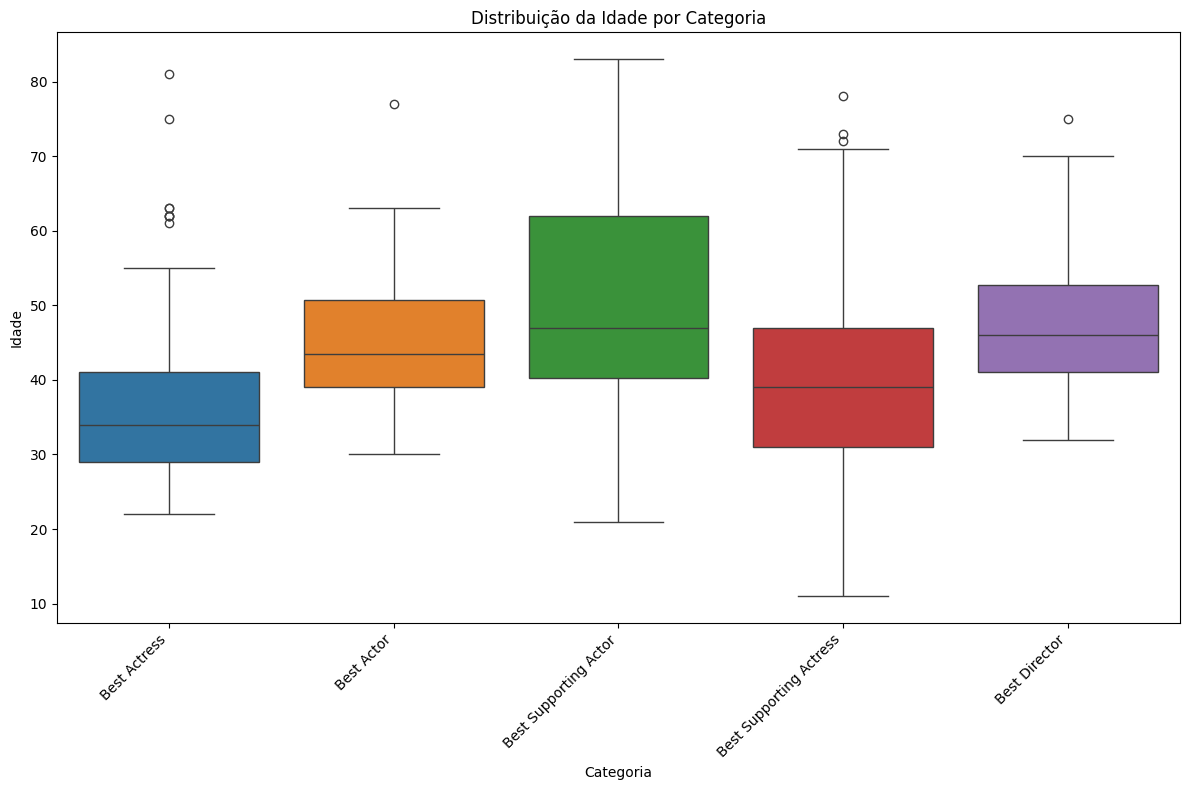

In [79]:
# Gráfico: Idade x categoria dos indicados. Como se relacionam?

# Converte a coluna 'ano_nascimento' para um formato numérico. Trata valores inválidos
df['ano_nascimento'] = pd.to_numeric(df['ano_nascimento'], errors='coerce')
# Calcula a idade dos indicados no ano da edição do Oscar
df['idade'] = df['ano_edicao'] - df['ano_nascimento']

# Cria o gráfico de boxplot, ajustando o tamanho e rotação dos rótulos
plt.figure(figsize=(12, 8))
sns.boxplot(x='categoria', y='idade', data=df, hue='categoria')

# Rotaciona os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45, ha='right')
plt.xlabel('Categoria')
plt.ylabel('Idade')
plt.title('Distribuição da Idade por Categoria')
# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()

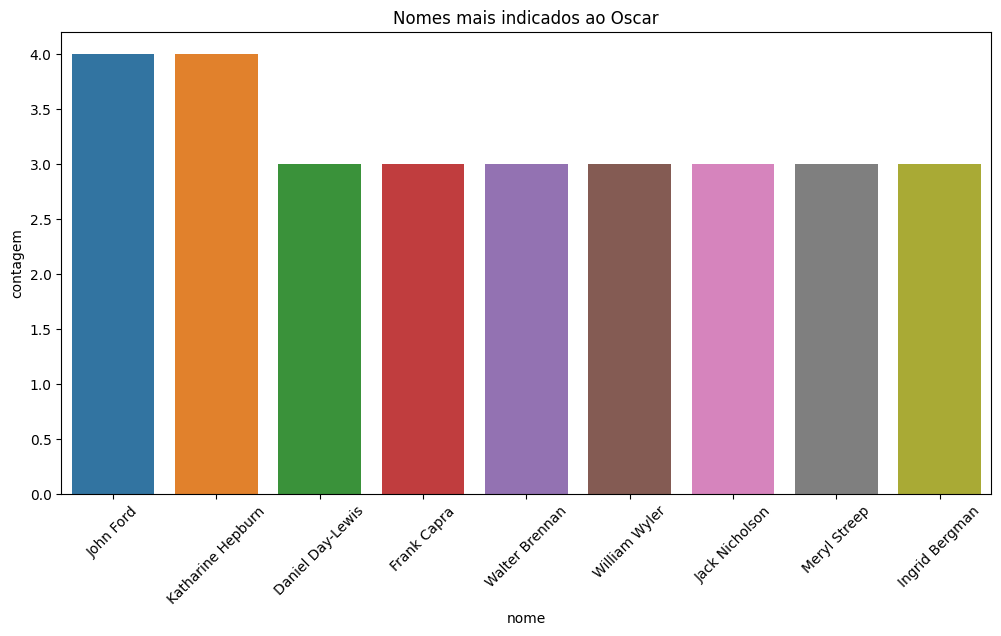

In [80]:
# Gráfico dos atores mais indicados 
# Quais são os atores mais indicados? Foram quantas indicações?

#plotando o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='nome', y='contagem', data=nomes_repetidos_3_ou_mais, hue='nome')
plt.title('Nomes mais indicados ao Oscar')
plt.xticks(rotation=45)
plt.show()

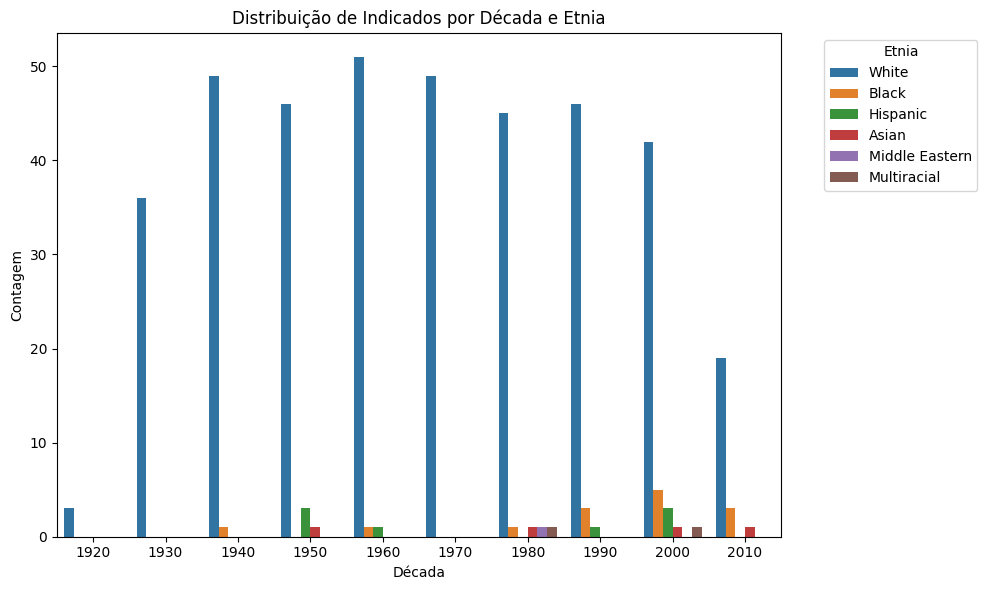

In [81]:
# Gráfico: Etnia dos indicados x década da indicação
# Quantos atores de cada etnia foram indicados em determinada década?

# Calcula a década de cada edição
df['decada'] = (df['ano_edicao'] // 10) * 10

# Cria o gráfico de contagem com a coluna 'decada' no eixo x e as categorias de 'etinia' como cor
plt.figure(figsize=(10, 6))
sns.countplot(x='decada', hue='etnia', data=df)

# Configurações dos rótulos e título
plt.xlabel('Década')
plt.ylabel('Contagem')
plt.title('Distribuição de Indicados por Década e Etnia')

# Ajuste da posição da legenda para o lado direito
plt.legend(title='Etnia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajuste do layout para evitar sobreposição
plt.tight_layout()

# Plota o gráfico
plt.show()
